In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')


from datetime import datetime

from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline



In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.

recentdate=session.query(func.max(Measurement.date)).first()
recentdate

('2017-08-23')

In [16]:
p=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').all()

datePrcp_df=pd.DataFrame(data=p,columns=["date","prcp"])
dategroupPrcp=datePrcp_df.groupby(["date"]).mean()
dategroupPrcp=dategroupPrcp.reset_index()
dategroupPrcp=dategroupPrcp.sort_values(by="date",ascending=True)

dategroupPrcp.to_csv("outputs/average_prcp.csv",
                  encoding="utf-8", index=False, header=True)



dategroupPrcp

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
...,...,...
361,2017-08-19,0.030000
362,2017-08-20,0.005000
363,2017-08-21,0.193333
364,2017-08-22,0.166667


In [17]:
listDate=dategroupPrcp["date"].tolist()
listPrcp=dategroupPrcp["prcp"].tolist()

In [18]:
dateList=dategroupPrcp["date"].tolist()
ex_dt=[]
for dt in range(0,len(dateList)):
    if dt%15==0:
        ex_dt.append(dateList[dt])

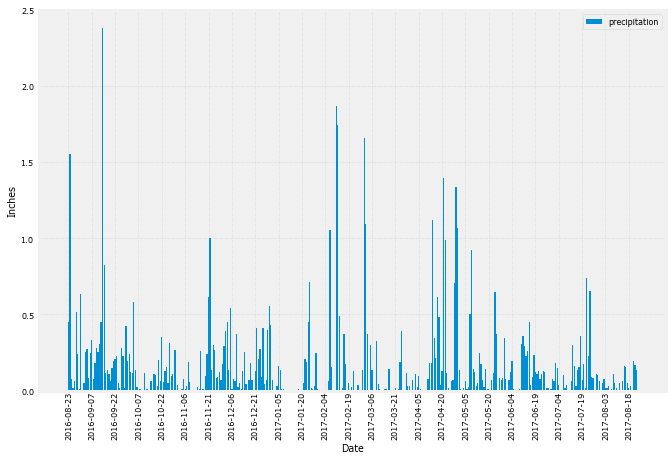

In [19]:
#plt.figure()
#plt.plot(listDate,listPrcp)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
rcParams['font.size'] = 8

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(listDate, listPrcp, label="precipitation")
plt.legend(loc="upper right")
plt.xlabel("Date")
plt.ylabel("Inches")
ax.xaxis.set_tick_params(pad=1)
ax.yaxis.set_tick_params(pad=5)
plt.xticks(ex_dt, rotation='vertical')
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5])
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
#plt.grid(True, linewidth= 1, linestyle="--")


plt.show()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data

dategroupPrcp.describe()


,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(func.count(Station.station)).all()
stations

[(9)]

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

activer=session.query(Station.name,func.count(Measurement.date))\
               .join(Measurement,Measurement.station==Station.station)\
               .group_by(Station.name)\
               .order_by(func.count(Measurement.date).desc())

activer_df=pd.DataFrame(data=activer,columns=["station","row_number"])
activer_df.to_csv("outputs/stations.csv",
                  encoding="utf-8", index=False, header=True)

for i,k in activer:
    print(f"Station Name: {i}, Row_Number: {k}")

Station Name: WAIHEE 837.5, HI US, Row_Number: 2772
Station Name: WAIKIKI 717.2, HI US, Row_Number: 2724
Station Name: KANEOHE 838.1, HI US, Row_Number: 2709
Station Name: WAIMANALO EXPERIMENTAL FARM, HI US, Row_Number: 2669
Station Name: MANOA LYON ARBO 785.2, HI US, Row_Number: 2612
Station Name: KUALOA RANCH HEADQUARTERS 886.9, HI US, Row_Number: 2202
Station Name: HONOLULU OBSERVATORY 702.2, HI US, Row_Number: 1979
Station Name: PEARL CITY, HI US, Row_Number: 1372
Station Name: UPPER WAHIAWA 874.3, HI US, Row_Number: 511


In [17]:
activer_df

,station,row_number
0,"WAIHEE 837.5, HI US",2772
1,"WAIKIKI 717.2, HI US",2724
2,"KANEOHE 838.1, HI US",2709
3,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,"MANOA LYON ARBO 785.2, HI US",2612
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,"PEARL CITY, HI US",1372
8,"UPPER WAHIAWA 874.3, HI US",511


In [18]:
# Using the most active station id from the previous query, 
#calculate the lowest, highest, and average temperature.

most_active_station=session.query(Station.station)\
                           .filter(Station.name == 'WAIHEE 837.5, HI US')\
                           .all()
for i in most_active_station:
    print(i)

('USC00519281',)


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [24]:
min_temperature_most_active_station=session.query(func.min(Measurement.tobs))\
                                       .filter(Measurement.station=="USC00519281")\
                                       .all()
min_temperature_most_active_station

[(54.0)]

In [25]:
max_temperature_most_active_station=session.query(func.max(Measurement.tobs))\
                                       .filter(Measurement.station=="USC00519281")\
                                       .all()
max_temperature_most_active_station



[(85.0)]

In [26]:
avg_temperature_most_active_station=session.query(func.avg(Measurement.tobs))\
                                       .filter(Measurement.station=="USC00519281")\
                                       .all()
avg_temperature_most_active_station

[(71.66378066378067)]

In [27]:
avg_temperature_most_active_station[0][0]

71.66378066378067

In [28]:
lst=[min_temperature_most_active_station[0][0],avg_temperature_most_active_station[0][0],max_temperature_most_active_station[0][0]]
lst


[54.0, 71.66378066378067, 85.0]

In [185]:
# Using the most active station id
# Query the last 12 months of temperature observation data 
#for this station and plot the results as a histogram

twelwe_month_temperature=session.query(Measurement.date,func.avg(Measurement.tobs))\
                                .filter(Measurement.date>'2016-08-22')\
                                .filter(Measurement.station=="USC00519281")\
                                .group_by(Measurement.date)

In [186]:
df=pd.DataFrame(data=twelwe_month_temperature,columns=["date","temperature"])
df.set_index('date',inplace=True)
df

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


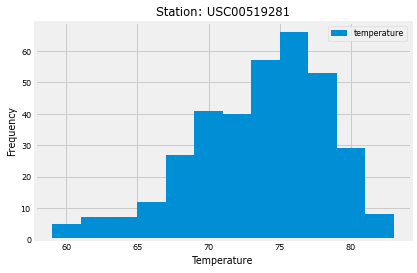

In [187]:
df.plot(kind='hist',bins=12)
plt.title("Station: USC00519281")
plt.xlabel("Temperature")
plt.savefig("outputs/temperature_frequencies_active_station.png")
plt.show()

In [188]:
df=df.reset_index()
df['date']=pd.to_datetime(df['date'])

In [189]:
df

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [191]:
df["month"]=df['date'].dt.month

In [192]:
df.to_csv("outputs/last_year.csv",
                  encoding="utf-8", index=False, header=True)

In [193]:
df

,date,temperature,month
0,2016-08-23,77.0,8
1,2016-08-24,77.0,8
2,2016-08-25,80.0,8
3,2016-08-26,80.0,8
4,2016-08-27,75.0,8
...,...,...,...
347,2017-08-14,77.0,8
348,2017-08-15,77.0,8
349,2017-08-16,76.0,8
350,2017-08-17,76.0,8


In [180]:
say=df.loc[:,["month","temperature"]].groupby(["month"]).mean()
say

,temperature
month,
1,68.322581
2,68.214286
3,70.612903
4,70.966667
5,73.096774
6,74.766667
7,76.935484
8,77.722222
9,77.766667


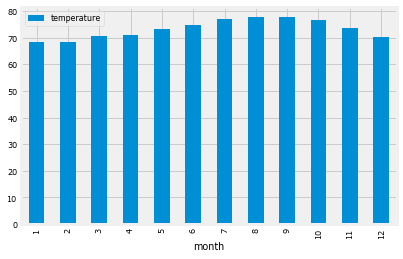

In [181]:
say.plot(kind='bar')
plt.show()

# Close session

In [182]:
# Close Session
session.close()